# Classifying newswires - a multiclass classification example

## Importing the dataset

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 4s 2us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

## Helper function to recover text for example

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
def get_review_text(example):
    return ' '.join(
        # index offset of -3  to account for 'padding', 'sequence start'
        # and 'unknown' tokens.
        reverse_word_index.get(i-3, '?') for i in example
    )

557056/550378 [==============================] - 1s 2us/step


## Prepare the data

In [12]:
import numpy as np

In [13]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [18]:
#one_hot_train_labels = to_one_hot(train_labels)
#one_hot_test_labels = to_one_hot(test_labels)

In [19]:
from keras.utils.np_utils import to_categorical

In [20]:
# equivalently to above:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Build a model

In [22]:
from keras import models, layers

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [24]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


## Set aside validation data

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Fit the model

In [28]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 171us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 107us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 100us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.7061 - acc: 0.8492 - val_loss: 0.9869 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.5696 - acc: 0.8790 - val_loss: 0.9418 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 111us/step - loss: 0.4626 - acc: 0.9034 - val_loss: 0.9092 - val_acc: 0.8030


## Inspect the history

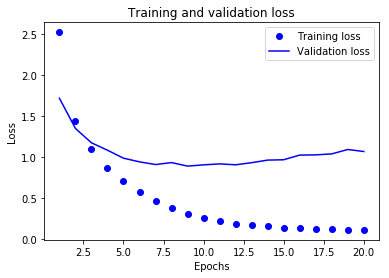

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


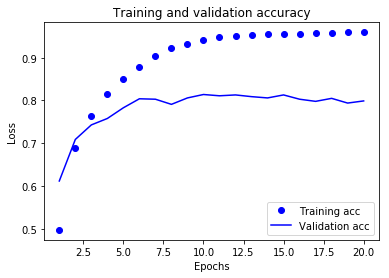

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retrain on fewer epochs and evalute on hold-out set

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 132us/step - loss: 2.6135 - acc: 0.4644 - val_loss: 1.7289 - val_acc: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 101us/step - loss: 1.4074 - acc: 0.7082 - val_loss: 1.2747 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 101us/step - loss: 1.0425 - acc: 0.7786 - val_loss: 1.1035 - val_acc: 0.7630
Epoch 4/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.8180 - acc: 0.8322 - val_loss: 1.0270 - val_acc: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.6507 - acc: 0.8629 - val_loss: 0.9513 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 105us/step - loss: 0.5297 - acc: 0.8904 - val_loss: 0.9206 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 101us/step - loss: 0.4213 - acc: 0.9113 - val_loss: 0.9006 - val_acc: 0.8140
Epoch 8

In [36]:
results

[0.9839374910797907, 0.7858414960459524]

## Calculate random baseline

In [38]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)

In [40]:
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19056099732858414

## Generate predictions

In [44]:
predictions = model.predict(x_test)

In [49]:
prediction_labels = np.argmax(predictions, axis=1)

In [50]:
predictions.shape

(2246, 46)

In [51]:
prediction_labels.shape

(2246,)

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [53]:
cm = confusion_matrix(test_labels, prediction_labels)

In [64]:
cm_normed = cm.astype('float32') / cm.sum(axis=1)

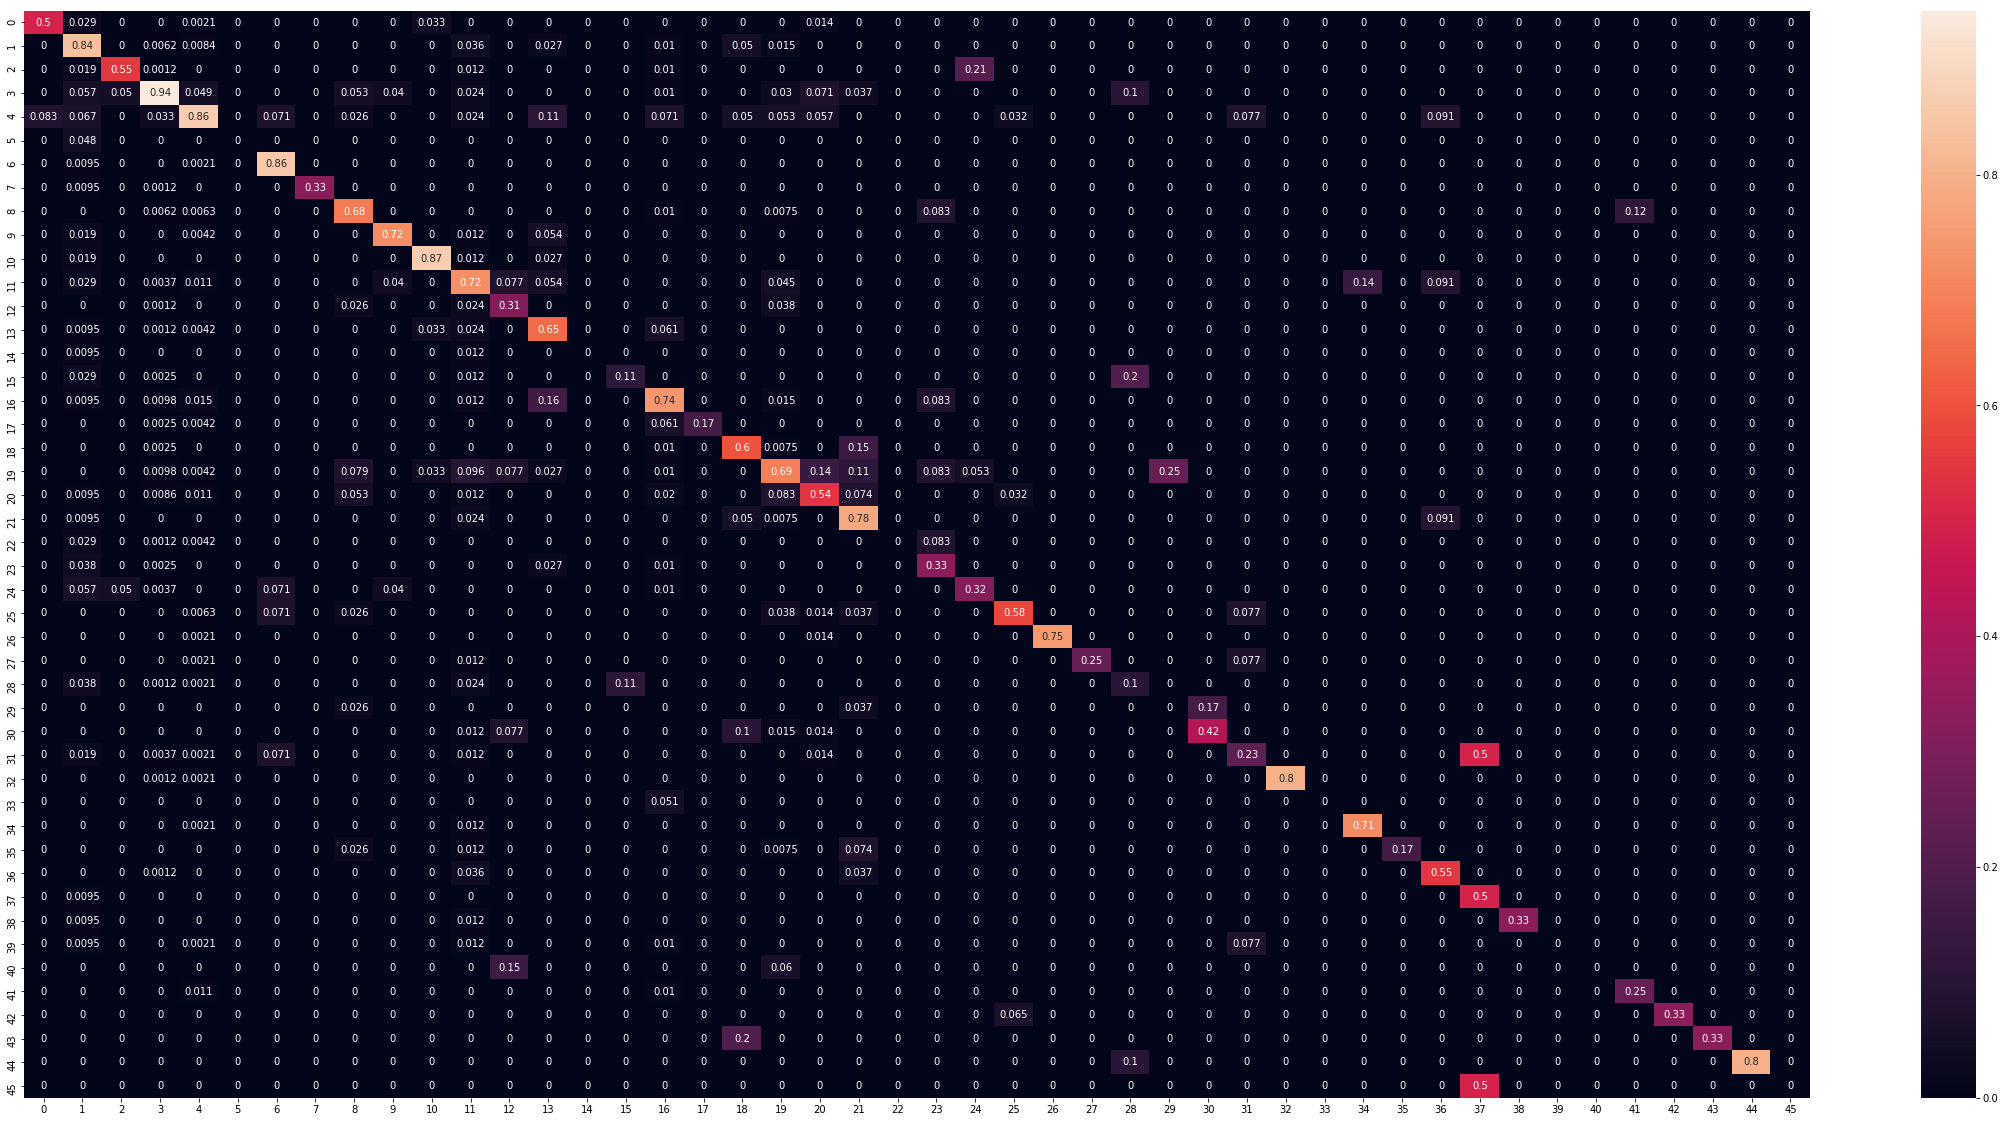

In [65]:
plt.figure(figsize=(40,20))
sn.heatmap(cm_normed, annot=True)